In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Ejercicio 2
Realiza las tareas de preprocesado y adecuación del Dataset que disponemos en el repositorio de GitHub  PRE-PROCESSING-FECHA con el objetivo de prepararlo y trabajarlo como dataframe para extraer información.

In [2]:
movie = 'movies.dat'

In [3]:
with open(movie, 'r', encoding='latin-1') as archivo:
    lineas = archivo.readlines()
datos = [linea.strip().split('::') for linea in lineas]
columnas = ['ID', 'Titulo', 'Genero']
df = pd.DataFrame(datos, columns=columnas)

df[['Pelicula', 'Año']] = df['Titulo'].str.rsplit('(', n=1, expand=True)
df['Año'] = df['Año'].str.rstrip(')')

df['Genero'] = df['Genero'].str.split('|').str[0]

df = df.drop('Titulo', axis=1)
df = df.drop('ID', axis=1)

Primero declare 'movie.dat' como movie para que fuera más corto al momento de escribir codigo. Despues leemos el archivo, dividimos los datos y declaramos las columnas para finalmente convertirlo a un dataframe. 

Lo que sigue es acomodar los datos de la forma que queremos, lo primero que hacemos es dividir 'Titulo' en 'Pelicula' y 'Año' aprovechado sus parentesis para separarlos.

Solo queremos un 'Genero' así que aprobechamos sus '|' para separarlos y despues nos quedamos únicamente con el primero.

Por último borramos tanto 'Titulo' como 'ID' porque esos datos no son relevantes.

In [4]:
df

,Genero,Pelicula,Año
0,Animation,Toy Story,1995
1,Adventure,Jumanji,1995
2,Comedy,Grumpier Old Men,1995
3,Comedy,Waiting to Exhale,1995
4,Comedy,Father of the Bride Part II,1995
...,...,...,...
3878,Comedy,Meet the Parents,2000
3879,Drama,Requiem for a Dream,2000
3880,Drama,Tigerland,2000
3881,Drama,Two Family House,2000


In [5]:
df.insert(2, 'Genero', df.pop('Genero'))

In [7]:
df['Año'] = pd.to_numeric(df['Año'], errors='coerce')

Como ven en la tabla de arriba 'Genero' es la primera columna y eso a mí no me gusta así que agrego y elimino la columna para basicamente moverla al final.

Tambien decidi convertir Año a numerico pensando en la creación de las gráficas, aunque al final fue innecesario.

In [8]:
df

,Pelicula,Año,Genero
0,Toy Story,1995,Animation
1,Jumanji,1995,Adventure
2,Grumpier Old Men,1995,Comedy
3,Waiting to Exhale,1995,Comedy
4,Father of the Bride Part II,1995,Comedy
...,...,...,...
3878,Meet the Parents,2000,Comedy
3879,Requiem for a Dream,2000,Drama
3880,Tigerland,2000,Drama
3881,Two Family House,2000,Drama


In [9]:
df[df['Pelicula'].isnull()]

,Pelicula,Año,Genero


In [10]:
df[df['Año'].isnull()]

,Pelicula,Año,Genero


In [11]:
df[df['Genero'].isnull()]

,Pelicula,Año,Genero


Antes de pasar al siguente ejercicio decidi verificar que no me hubieran quedado nulls, y como pueden ver no.

# Ejercicio 3
Muestra tu creatividad. ¿Qué crees relevante mostrar del Dataset " movies.dat " del ejercicio anterior?

Realiza una o dos representaciones gráficas y justifica tu elección.

In [12]:
muestra = (df[df['Año'] == 2000])

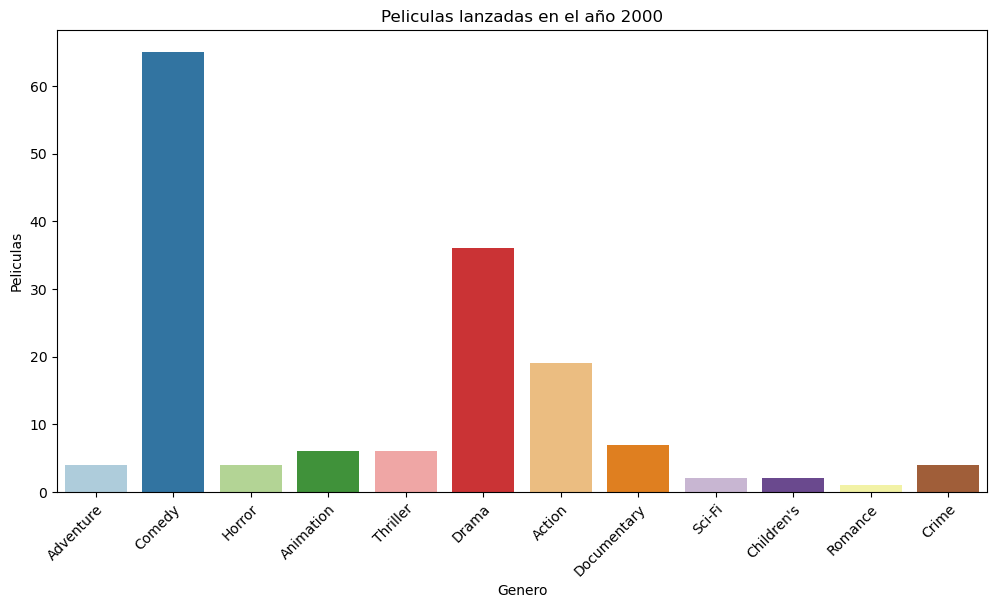

In [13]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Genero', data=muestra, palette='Paired')
plt.xlabel('Genero')
plt.ylabel('Peliculas')
plt.title('Peliculas lanzadas en el año 2000')
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.show()

Esta primera gráfica muestra las peliculas únicamente del año 2000 dividida por generos. Útil si quieres checar las tendencias más recientes

Text(0.5, 0, 'Año')

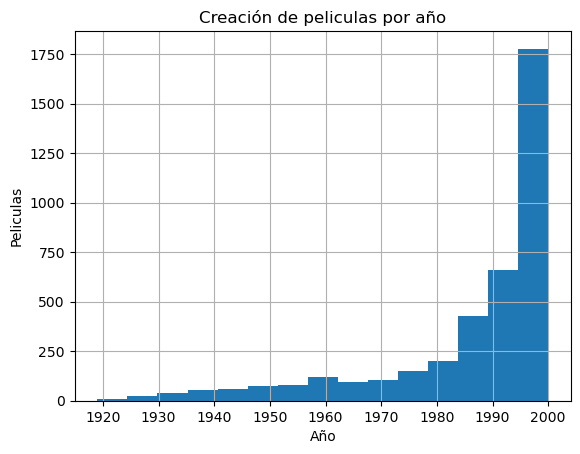

In [18]:
df.hist(['Año'], bins=15)
plt.title('Creación de peliculas por año')
plt.ylabel('Peliculas')
plt.xlabel('Año')

El histograma presentado muestra como la produción de peliculas se vio aumentada significativamente durante los últimos años.

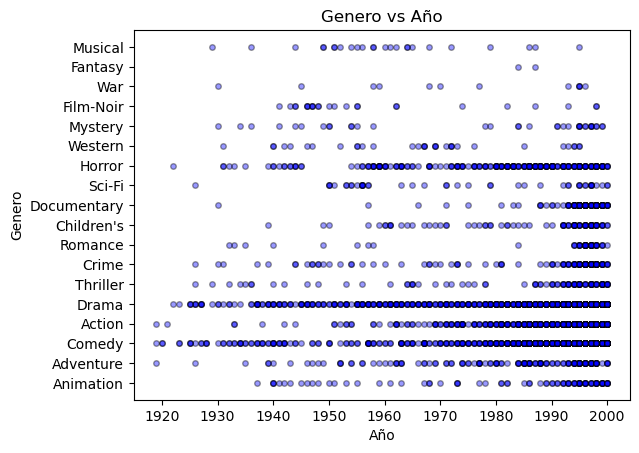

In [16]:
x = df.Año
y = df.Genero
colors = 'Blue'
area = np.pi*5

plt.scatter(x, y, s=area, c=colors, alpha=0.4, edgecolors='black')

plt.title('Genero vs Año')
plt.ylabel('Genero')
plt.xlabel('Año')
plt.show()

Aquí vemos una comparación de generos con los años de lanzamiento. Lo primero que note es que tal y como mostro el histograma, en los últimos años hay mayor cantidad de peliculas, pero despues de eso hay muchas otras conclusiones que podemos sacar.

La comedia y el drama son generos que siempre fueron populares y nunca bajaron, los generos de acción, animación, entre otras tuvieron una mayor popularidad durante los últimos años aunque podria tambien deberse a la mayor producción de peliculas en general, y otras como Musical o Film-Noir tuvieron una epoca de oro pero perdieron relevancia con el tiempo.